In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [41]:
# read csv
path_city = os.path.join('city_data.csv')
path_ride = os.path.join('ride_data.csv')

df_city = pd.read_csv(path_city)
df_ride = pd.read_csv(path_ride)

# merge dataframes
df_merged = pd.merge(df_city, df_ride, on='city')

# rearrange columns
col = [0,3,4,5,1,2]
df_city_ride = df_merged.iloc[:,col]

df_city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Kelseyland,2016-08-19 04:27:52,5.51,6246006544795,63,Urban
1,Kelseyland,2016-04-17 06:59:50,5.54,7466473222333,63,Urban
2,Kelseyland,2016-05-04 15:06:07,30.54,2140501382736,63,Urban
3,Kelseyland,2016-01-25 20:44:56,12.08,1896987891309,63,Urban
4,Kelseyland,2016-08-09 18:19:47,17.91,8784212854829,63,Urban


In [92]:
# Create group based on the values in the "city column
group_city = df_city_ride.groupby(['city'])

# Calculate Average Fare ($) Per City
average_fare = group_city['fare'].mean()

# Calculate Total Number of Rides Per City
total_rides = group_city['ride_id'].nunique()

# Calculate Total Number of Drivers Per City
total_drivers = group_city['driver_count'].max()

# Determine City Type 
city_type = group_city['type'].max()

# Create dataframe with results
summary_city = pd.DataFrame({'Average Fare ($)': average_fare,
                          'Total Number of Rides': total_rides,
                          'Total Number of Drivers': total_drivers,
                          'City Type': city_type})
# Group by City Type
# Urban
urban = summary_city.loc[summary_city['City Type'] == 'Urban']
total_rides_urban = urban['Total Number of Rides']
avg_fare_urban = urban['Average Fare ($)']
total_drivers_urban = urban['Total Number of Drivers']

# Suburban
suburban = summary_city.loc[summary_city['City Type'] == 'Suburban']
total_rides_suburban = suburban['Total Number of Rides']
avg_fare_suburban = suburban['Average Fare ($)']
total_drivers_suburban = suburban['Total Number of Drivers']

# Rural
rural = summary_city.loc[summary_city['City Type'] == 'Rural']
total_rides_rural = rural['Total Number of Rides']
avg_fare_rural = rural['Average Fare ($)']
total_drivers_rural = rural['Total Number of Drivers']

summary_city.head()

,Average Fare ($),City Type,Total Number of Drivers,Total Number of Rides
city,,,,
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Anitamouth,37.315556,Suburban,16,9
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19


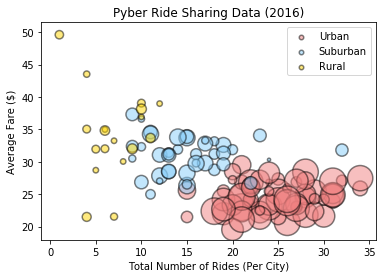

In [117]:
# use the scatter function
plt.figure()
urban_plot = plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*10, 
                         color='lightcoral', alpha=0.5, edgecolor='black', linewidths=1.5, 
                         label='Urban')
suburban_plot = plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*10, 
                            color='lightskyblue', alpha=0.5, edgecolor='black',linewidths=1.5, 
                            label='Suburban')
rural_plot = plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*10, 
                         color='gold', alpha=0.5, edgecolor='black',linewidths=1.5, 
                         label='Rural')
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
lgnd = plt.legend(handles=[urban_plot,suburban_plot,rural_plot], loc ='upper right')
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
plt.show()

In [ ]:
# % of Total Fares by City Type

In [ ]:
# % of Total Rides by City Type

In [ ]:
# % of Total Drivers by City Type